In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
data = {}
for tp in range(4):
    data[tp+1]  = pd.read_csv(f'datos\counted\d{tp+1}_allcounted.csv', index_col=0)

In [5]:
data[1].columns

Index(['avisoid', 'empresaid', 'avisofechapublicacion', 'avisovacante',
       'mostrarsueldo', 'avisoexperiencia', 'expiracion', 'dias',
       'avisorepublicacion', 'avisocargo', 'areanombre',
       'actividadempresanombre', 'avisocuerpo', 'disponibilidadnombre',
       'avisoduracioncont', 'avisolugartrabajo', 'gradoescolarnombre',
       'situacionestudios', 'avisorequisitos', 'carreras', 'estado',
       'endpagado_o_gratuito', 'nivelnombre', 'carreras_array',
       'sueldoestimado', '_merge', 'avcu_b1', 'avca_b1', 'avre_b1', 'avcu_b2',
       'avca_b2', 'avre_b2', 'avcu_b3', 'avca_b3', 'avre_b3', 'avcu_b4',
       'avca_b4', 'avre_b4', 'teletrabajo_', 'bucket1', 'bucket2', 'bucket3',
       'bucket4', 'wfh', 'similars', 'pseudoindex', 'duplicates_avisocuerpo1m',
       'duplicates_avisocuerpo2m', 'duplicates_avisocuerpo3m',
       'duplicates_avisocuerpo6m', 'duplicates_avisocargo1m',
       'duplicates_avisocargo2m', 'duplicates_avisocargo3m',
       'duplicates_avisocargo6m',

Dates

In [6]:
dates = np.concatenate((data[1]['avisofechapublicacion'].unique(), data[2]['avisofechapublicacion'].unique(), 
                        data[3]['avisofechapublicacion'].unique(), data[4]['avisofechapublicacion'].unique()), axis=0)

Data Frame to sum duplicates

In [7]:
newData = pd.concat([data[1], data[2], data[3], data[4]], axis=0, ignore_index=True)

In [8]:
newData['avisofechapublicacion'] = pd.to_datetime(newData['avisofechapublicacion'])

In [43]:
wfhData = newData[newData['wfh'] == True]

By month (Window 1M)

In [9]:
newData.columns

Index(['avisoid', 'empresaid', 'avisofechapublicacion', 'avisovacante',
       'mostrarsueldo', 'avisoexperiencia', 'expiracion', 'dias',
       'avisorepublicacion', 'avisocargo', 'areanombre',
       'actividadempresanombre', 'avisocuerpo', 'disponibilidadnombre',
       'avisoduracioncont', 'avisolugartrabajo', 'gradoescolarnombre',
       'situacionestudios', 'avisorequisitos', 'carreras', 'estado',
       'endpagado_o_gratuito', 'nivelnombre', 'carreras_array',
       'sueldoestimado', '_merge', 'avcu_b1', 'avca_b1', 'avre_b1', 'avcu_b2',
       'avca_b2', 'avre_b2', 'avcu_b3', 'avca_b3', 'avre_b3', 'avcu_b4',
       'avca_b4', 'avre_b4', 'teletrabajo_', 'bucket1', 'bucket2', 'bucket3',
       'bucket4', 'wfh', 'similars', 'pseudoindex', 'duplicates_avisocuerpo1m',
       'duplicates_avisocuerpo2m', 'duplicates_avisocuerpo3m',
       'duplicates_avisocuerpo6m', 'duplicates_avisocargo1m',
       'duplicates_avisocargo2m', 'duplicates_avisocargo3m',
       'duplicates_avisocargo6m',

In [73]:
newData_d = newData[['avisofechapublicacion', 'avisoid', 'empresaid','wfh', 
                     'duplicates_avisocuerpo1m', 'duplicates_avisocuerpo2m',
       'duplicates_avisocuerpo3m', 'duplicates_avisocuerpo6m',
       'duplicates_avisocargo1m', 'duplicates_avisocargo2m',
       'duplicates_avisocargo3m', 'duplicates_avisocargo6m',
       'duplicates_sueldoestimado1m', 'duplicates_sueldoestimado2m',
       'duplicates_sueldoestimado3m', 'duplicates_sueldoestimado6m', 'avisovacante' ]]

In [74]:
newData1m = newData_d.resample('1m', on='avisofechapublicacion').agg(
    {'avisoid': 'count',
     'empresaid': 'nunique',
     'wfh' : 'sum',
     'duplicates_avisocuerpo1m' : 'sum',
     'duplicates_avisocuerpo2m' : 'sum',
     'duplicates_avisocuerpo3m' : 'sum',
     'duplicates_avisocuerpo6m' : 'sum',
     'duplicates_avisocargo1m' : 'sum',
     'duplicates_avisocargo2m' : 'sum',
     'duplicates_avisocargo3m' : 'sum',
     'duplicates_avisocargo6m' : 'sum',
     'duplicates_sueldoestimado1m' : 'sum',
     'duplicates_sueldoestimado2m' : 'sum',
     'duplicates_sueldoestimado3m' : 'sum',
     'duplicates_sueldoestimado6m' : 'sum',
     'avisovacante' : 'sum' }).reset_index()

In [75]:
newData3m = newData_d.resample('3m', on='avisofechapublicacion').agg(
    {'avisoid': 'count',
     'empresaid': 'nunique',
     'wfh' : 'sum',
     'duplicates_avisocuerpo1m' : 'sum',
     'duplicates_avisocuerpo2m' : 'sum',
     'duplicates_avisocuerpo3m' : 'sum',
     'duplicates_avisocuerpo6m' : 'sum',
     'duplicates_avisocargo1m' : 'sum',
     'duplicates_avisocargo2m' : 'sum',
     'duplicates_avisocargo3m' : 'sum',
     'duplicates_avisocargo6m' : 'sum',
     'duplicates_sueldoestimado1m' : 'sum',
     'duplicates_sueldoestimado2m' : 'sum',
     'duplicates_sueldoestimado3m' : 'sum',
     'duplicates_sueldoestimado6m' : 'sum',
     'avisovacante' : 'sum' }).reset_index()

In [76]:
newData6m = newData_d.resample('6m', on='avisofechapublicacion').agg(
    {'avisoid': 'count',
     'empresaid': 'nunique',
     'wfh' : 'sum',
     'duplicates_avisocuerpo1m' : 'sum',
     'duplicates_avisocuerpo2m' : 'sum',
     'duplicates_avisocuerpo3m' : 'sum',
     'duplicates_avisocuerpo6m' : 'sum',
     'duplicates_avisocargo1m' : 'sum',
     'duplicates_avisocargo2m' : 'sum',
     'duplicates_avisocargo3m' : 'sum',
     'duplicates_avisocargo6m' : 'sum',
     'duplicates_sueldoestimado1m' : 'sum',
     'duplicates_sueldoestimado2m' : 'sum',
     'duplicates_sueldoestimado3m' : 'sum',
     'duplicates_sueldoestimado6m' : 'sum',
     'avisovacante' : 'sum' }).reset_index()

### Graphs

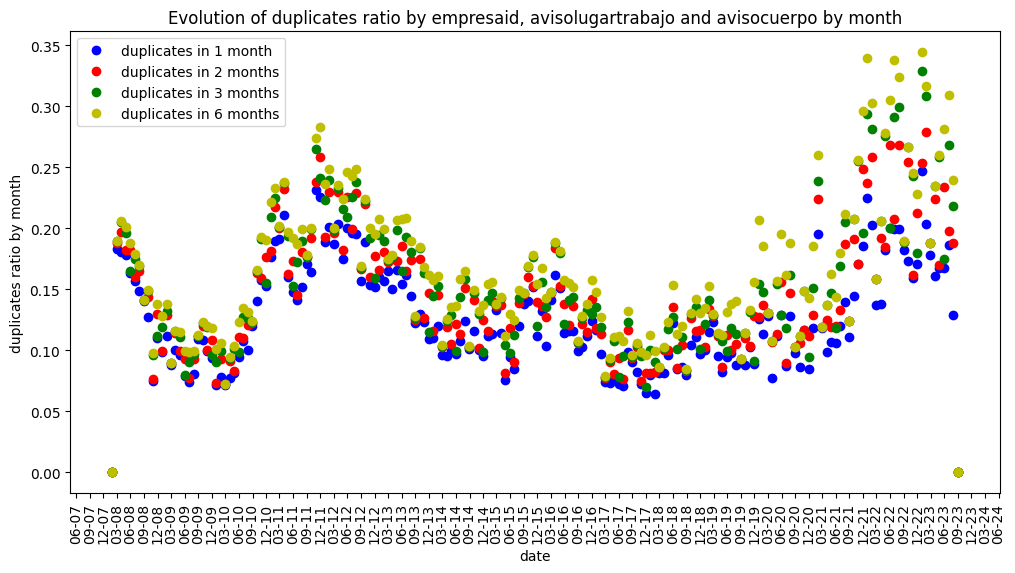

In [17]:
# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(newData1m['avisofechapublicacion'], newData1m['duplicates_avisocuerpo1m'] / newData1m['avisoid'], marker='o', linestyle='None', color='b', label='duplicates in 1 month')
plt.plot(newData1m['avisofechapublicacion'], newData1m['duplicates_avisocuerpo2m'] / newData1m['avisoid'], marker='o', linestyle='None', color='r', label='duplicates in 2 months')
plt.plot(newData1m['avisofechapublicacion'], newData1m['duplicates_avisocuerpo3m'] / newData1m['avisoid'], marker='o', linestyle='None', color='g', label='duplicates in 3 months')
plt.plot(newData1m['avisofechapublicacion'], newData1m['duplicates_avisocuerpo6m'] / newData1m['avisoid'], marker='o', linestyle='None', color='y', label='duplicates in 6 months')

# Format the x-axis ticks to show 'mm-y' and rotate them
date_format = mdates.DateFormatter('%m-%y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set tick frequency to 1 month
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees

plt.title('Evolution of duplicates ratio by empresaid, avisolugartrabajo and avisocuerpo by month')
plt.xlabel('date')
plt.ylabel('duplicates ratio by month')
plt.grid(False)
plt.legend()

plt.show()


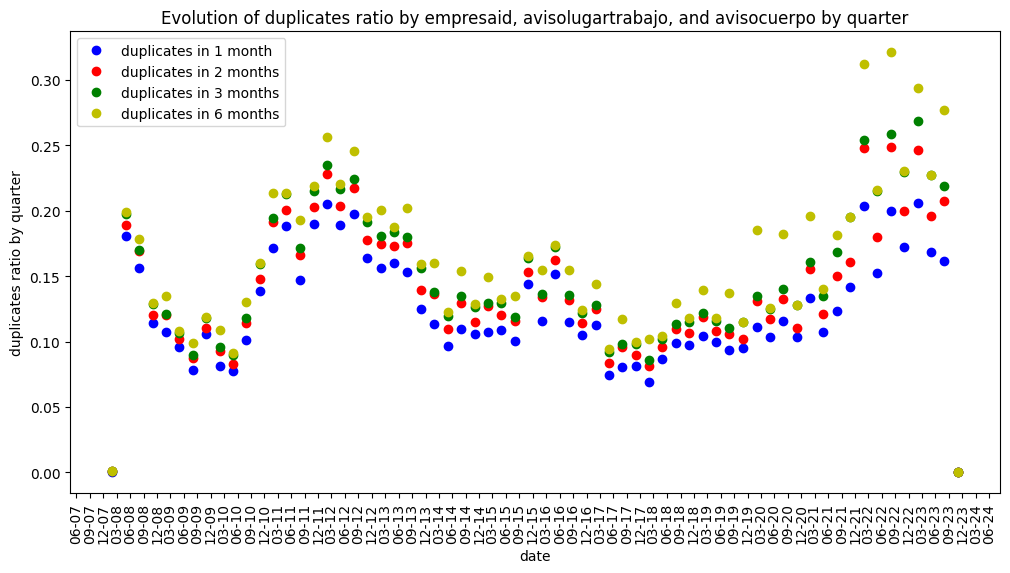

In [18]:
# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(newData3m['avisofechapublicacion'], newData3m['duplicates_avisocuerpo1m'] / newData3m['avisoid'], marker='o', linestyle='None', color='b', label='duplicates in 1 month')
plt.plot(newData3m['avisofechapublicacion'], newData3m['duplicates_avisocuerpo2m'] / newData3m['avisoid'], marker='o', linestyle='None', color='r', label='duplicates in 2 months')
plt.plot(newData3m['avisofechapublicacion'], newData3m['duplicates_avisocuerpo3m'] / newData3m['avisoid'], marker='o', linestyle='None', color='g', label='duplicates in 3 months')
plt.plot(newData3m['avisofechapublicacion'], newData3m['duplicates_avisocuerpo6m'] / newData3m['avisoid'], marker='o', linestyle='None', color='y', label='duplicates in 6 months')

# Format the x-axis ticks to show 'mm-y' and rotate them
date_format = mdates.DateFormatter('%m-%y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set tick frequency to 1 month
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees

plt.title('Evolution of duplicates ratio by empresaid, avisolugartrabajo, and avisocuerpo by quarter')
plt.xlabel('date')
plt.ylabel('duplicates ratio by quarter')
plt.grid(False)
plt.legend()

plt.show()


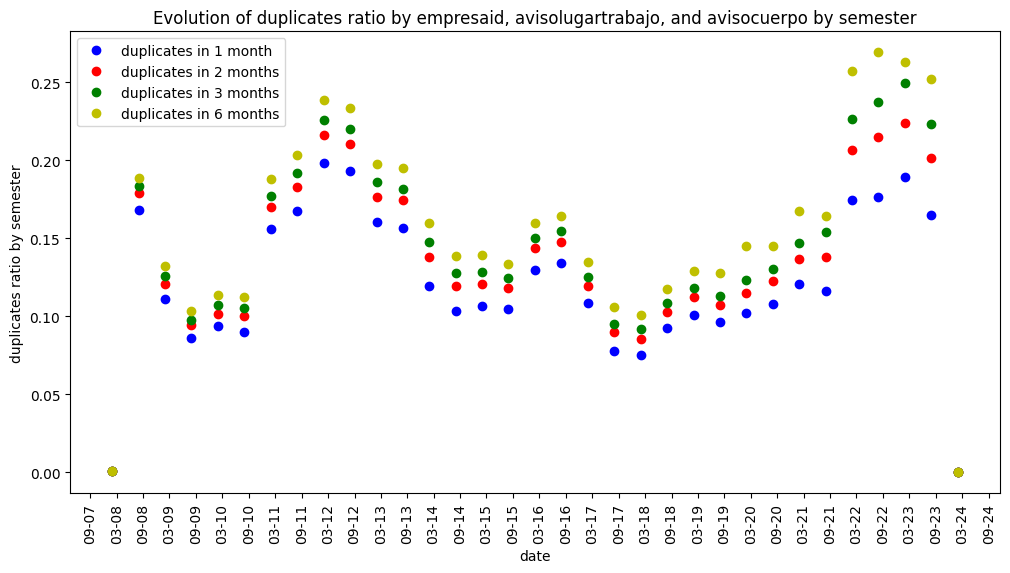

In [19]:
# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(newData6m['avisofechapublicacion'], newData6m['duplicates_avisocuerpo1m'] / newData6m['avisoid'], marker='o', linestyle='None', color='b', label='duplicates in 1 month')
plt.plot(newData6m['avisofechapublicacion'], newData6m['duplicates_avisocuerpo2m'] / newData6m['avisoid'], marker='o', linestyle='None', color='r', label='duplicates in 2 months')
plt.plot(newData6m['avisofechapublicacion'], newData6m['duplicates_avisocuerpo3m'] / newData6m['avisoid'], marker='o', linestyle='None', color='g', label='duplicates in 3 months')
plt.plot(newData6m['avisofechapublicacion'], newData6m['duplicates_avisocuerpo6m'] / newData6m['avisoid'], marker='o', linestyle='None', color='y', label='duplicates in 6 months')

# Format the x-axis ticks to show 'mm-y' and rotate them
date_format = mdates.DateFormatter('%m-%y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Set tick frequency to 1 month
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees

plt.title('Evolution of duplicates ratio by empresaid, avisolugartrabajo, and avisocuerpo by semester')
plt.xlabel('date')
plt.ylabel('duplicates ratio by semester')
plt.grid(False)
plt.legend()

plt.show()


__________________________________

### Avisocargo

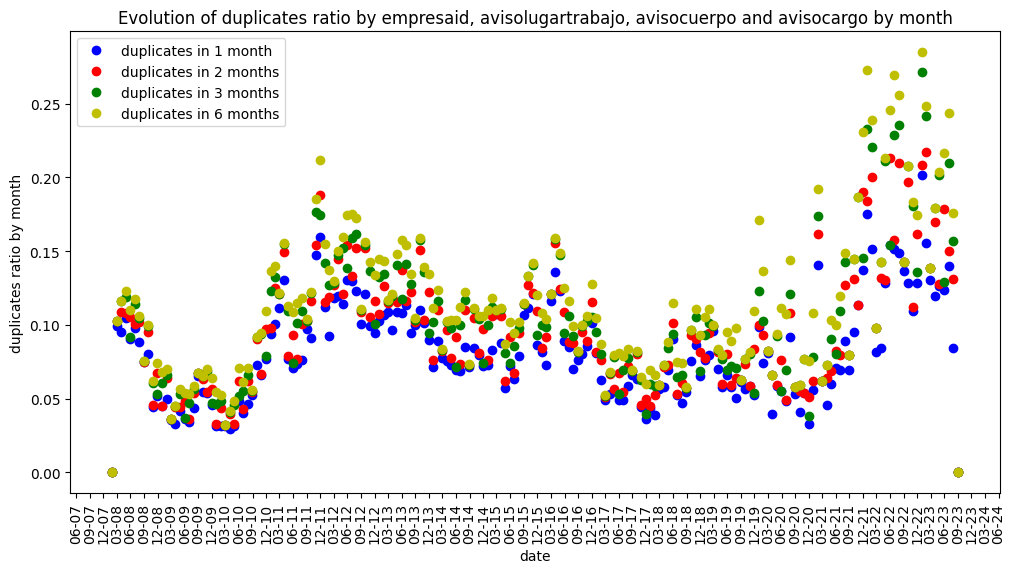

In [20]:
# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(newData1m['avisofechapublicacion'], newData1m['duplicates_avisocargo1m'] / newData1m['avisoid'], marker='o', linestyle='None', color='b', label='duplicates in 1 month')
plt.plot(newData1m['avisofechapublicacion'], newData1m['duplicates_avisocargo2m'] / newData1m['avisoid'], marker='o', linestyle='None', color='r', label='duplicates in 2 months')
plt.plot(newData1m['avisofechapublicacion'], newData1m['duplicates_avisocargo3m'] / newData1m['avisoid'], marker='o', linestyle='None', color='g', label='duplicates in 3 months')
plt.plot(newData1m['avisofechapublicacion'], newData1m['duplicates_avisocargo6m'] / newData1m['avisoid'], marker='o', linestyle='None', color='y', label='duplicates in 6 months')

# Format the x-axis ticks to show 'mm-y' and rotate them
date_format = mdates.DateFormatter('%m-%y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set tick frequency to 1 month
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees

plt.title('Evolution of duplicates ratio by empresaid, avisolugartrabajo, avisocuerpo and avisocargo by month')
plt.xlabel('date')
plt.ylabel('duplicates ratio by month')
plt.grid(False)
plt.legend()

plt.show()


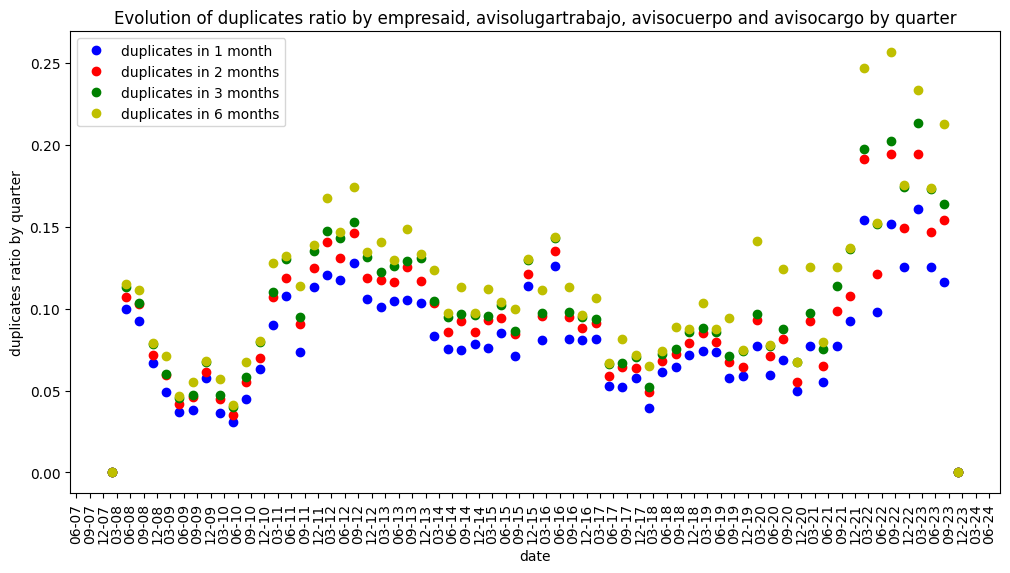

In [36]:
# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(newData3m['avisofechapublicacion'], newData3m['duplicates_avisocargo1m'] / newData3m['avisoid'], marker='o', linestyle='None', color='b', label='duplicates in 1 month')
plt.plot(newData3m['avisofechapublicacion'], newData3m['duplicates_avisocargo2m'] / newData3m['avisoid'], marker='o', linestyle='None', color='r', label='duplicates in 2 months')
plt.plot(newData3m['avisofechapublicacion'], newData3m['duplicates_avisocargo3m'] / newData3m['avisoid'], marker='o', linestyle='None', color='g', label='duplicates in 3 months')
plt.plot(newData3m['avisofechapublicacion'], newData3m['duplicates_avisocargo6m'] / newData3m['avisoid'], marker='o', linestyle='None', color='y', label='duplicates in 6 months')

# Format the x-axis ticks to show 'mm-y' and rotate them
date_format = mdates.DateFormatter('%m-%y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set tick frequency to 1 month
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees

plt.title('Evolution of duplicates ratio by empresaid, avisolugartrabajo, avisocuerpo and avisocargo by quarter')
plt.xlabel('date')
plt.ylabel('duplicates ratio by quarter')
plt.grid(False)
plt.legend()

plt.show()

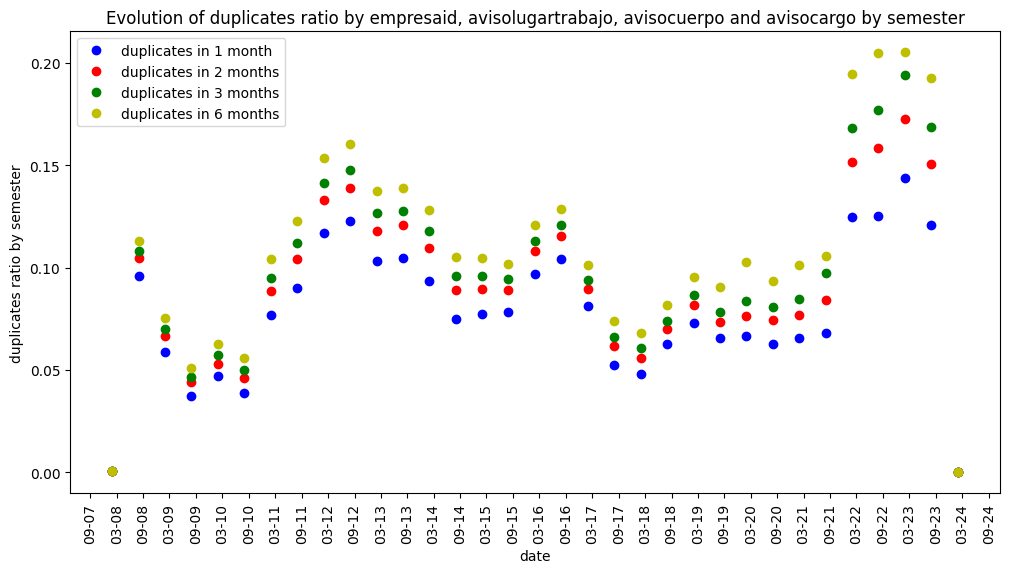

In [24]:
# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(newData6m['avisofechapublicacion'], newData6m['duplicates_avisocargo1m'] / newData6m['avisoid'], marker='o', linestyle='None', color='b', label='duplicates in 1 month')
plt.plot(newData6m['avisofechapublicacion'], newData6m['duplicates_avisocargo2m'] / newData6m['avisoid'], marker='o', linestyle='None', color='r', label='duplicates in 2 months')
plt.plot(newData6m['avisofechapublicacion'], newData6m['duplicates_avisocargo3m'] / newData6m['avisoid'], marker='o', linestyle='None', color='g', label='duplicates in 3 months')
plt.plot(newData6m['avisofechapublicacion'], newData6m['duplicates_avisocargo6m'] / newData6m['avisoid'], marker='o', linestyle='None', color='y', label='duplicates in 6 months')

# Format the x-axis ticks to show 'mm-y' and rotate them
date_format = mdates.DateFormatter('%m-%y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Set tick frequency to 6 months
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees

plt.title('Evolution of duplicates ratio by empresaid, avisolugartrabajo, avisocuerpo and avisocargo by semester')
plt.xlabel('date')
plt.ylabel('duplicates ratio by semester')
plt.grid(False)
plt.legend()

plt.show()



__________________________________

### avisosueldo

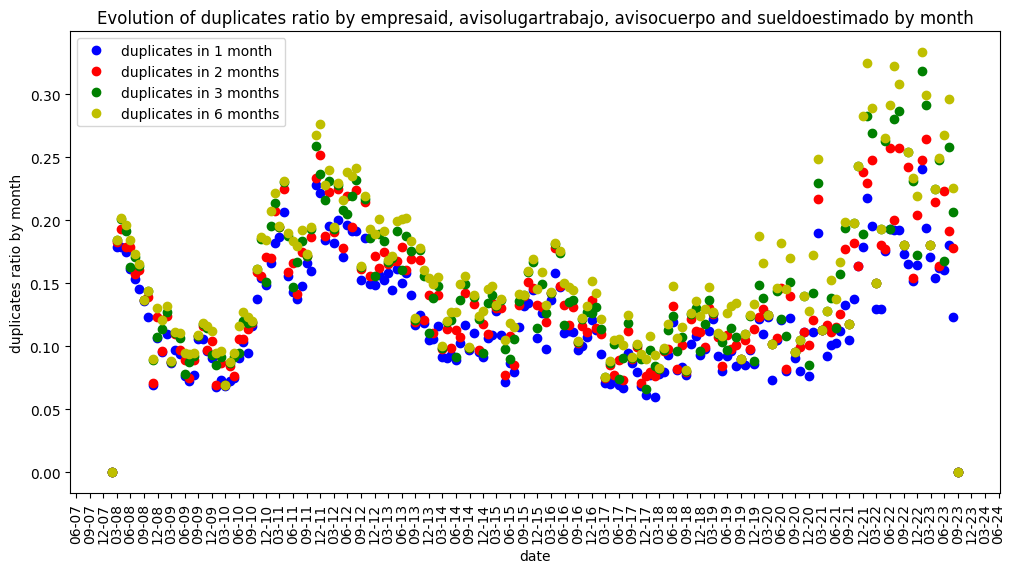

In [28]:
# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(newData1m['avisofechapublicacion'], newData1m['duplicates_sueldoestimado1m'] / newData1m['avisoid'], marker='o', linestyle='None', color='b', label='duplicates in 1 month')
plt.plot(newData1m['avisofechapublicacion'], newData1m['duplicates_sueldoestimado2m'] / newData1m['avisoid'], marker='o', linestyle='None', color='r', label='duplicates in 2 months')
plt.plot(newData1m['avisofechapublicacion'], newData1m['duplicates_sueldoestimado3m'] / newData1m['avisoid'], marker='o', linestyle='None', color='g', label='duplicates in 3 months')
plt.plot(newData1m['avisofechapublicacion'], newData1m['duplicates_sueldoestimado6m'] / newData1m['avisoid'], marker='o', linestyle='None', color='y', label='duplicates in 6 months')

# Format the x-axis ticks to show 'mm-y' and rotate them
date_format = mdates.DateFormatter('%m-%y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set tick frequency to 1 month
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees

plt.title('Evolution of duplicates ratio by empresaid, avisolugartrabajo, avisocuerpo and sueldoestimado by month')
plt.xlabel('date')
plt.ylabel('duplicates ratio by month')
plt.grid(False)
plt.legend()

plt.show()


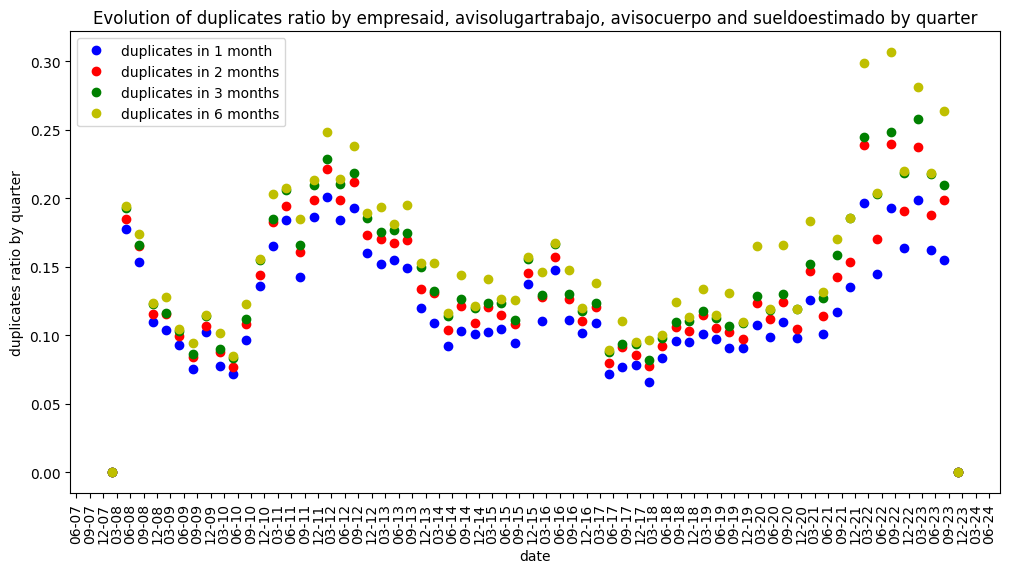

In [38]:
# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(newData3m['avisofechapublicacion'], newData3m['duplicates_sueldoestimado1m'] / newData3m['avisoid'], marker='o', linestyle='None', color='b', label='duplicates in 1 month')
plt.plot(newData3m['avisofechapublicacion'], newData3m['duplicates_sueldoestimado2m'] / newData3m['avisoid'], marker='o', linestyle='None', color='r', label='duplicates in 2 months')
plt.plot(newData3m['avisofechapublicacion'], newData3m['duplicates_sueldoestimado3m'] / newData3m['avisoid'], marker='o', linestyle='None', color='g', label='duplicates in 3 months')
plt.plot(newData3m['avisofechapublicacion'], newData3m['duplicates_sueldoestimado6m'] / newData3m['avisoid'], marker='o', linestyle='None', color='y', label='duplicates in 6 months')

# Format the x-axis ticks to show 'mm-y' and rotate them
date_format = mdates.DateFormatter('%m-%y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set tick frequency to 1 month
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees

plt.title('Evolution of duplicates ratio by empresaid, avisolugartrabajo, avisocuerpo and sueldoestimado by quarter')
plt.xlabel('date')
plt.ylabel('duplicates ratio by quarter')
plt.grid(False)
plt.legend()

plt.show()


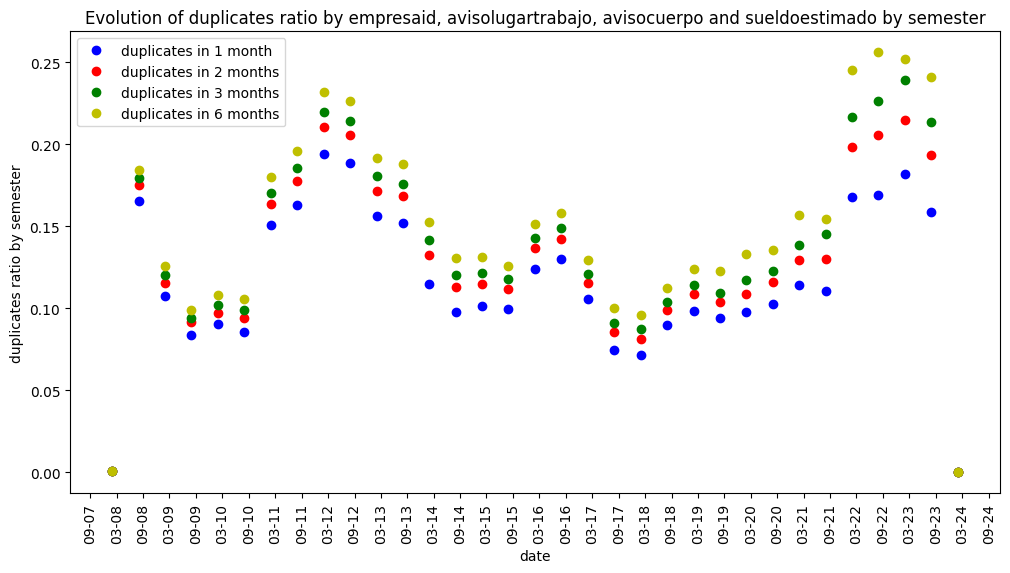

In [39]:
# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(newData6m['avisofechapublicacion'], newData6m['duplicates_sueldoestimado1m'] / newData6m['avisoid'], marker='o', linestyle='None', color='b', label='duplicates in 1 month')
plt.plot(newData6m['avisofechapublicacion'], newData6m['duplicates_sueldoestimado2m'] / newData6m['avisoid'], marker='o', linestyle='None', color='r', label='duplicates in 2 months')
plt.plot(newData6m['avisofechapublicacion'], newData6m['duplicates_sueldoestimado3m'] / newData6m['avisoid'], marker='o', linestyle='None', color='g', label='duplicates in 3 months')
plt.plot(newData6m['avisofechapublicacion'], newData6m['duplicates_sueldoestimado6m'] / newData6m['avisoid'], marker='o', linestyle='None', color='y', label='duplicates in 6 months')

# Format the x-axis ticks to show 'mm-y' and rotate them
date_format = mdates.DateFormatter('%m-%y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Set tick frequency to 6 months
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees

plt.title('Evolution of duplicates ratio by empresaid, avisolugartrabajo, avisocuerpo and sueldoestimado by semester')
plt.xlabel('date')
plt.ylabel('duplicates ratio by semester')
plt.grid(False)
plt.legend()

plt.show()



__________________________________

### Differences between variable

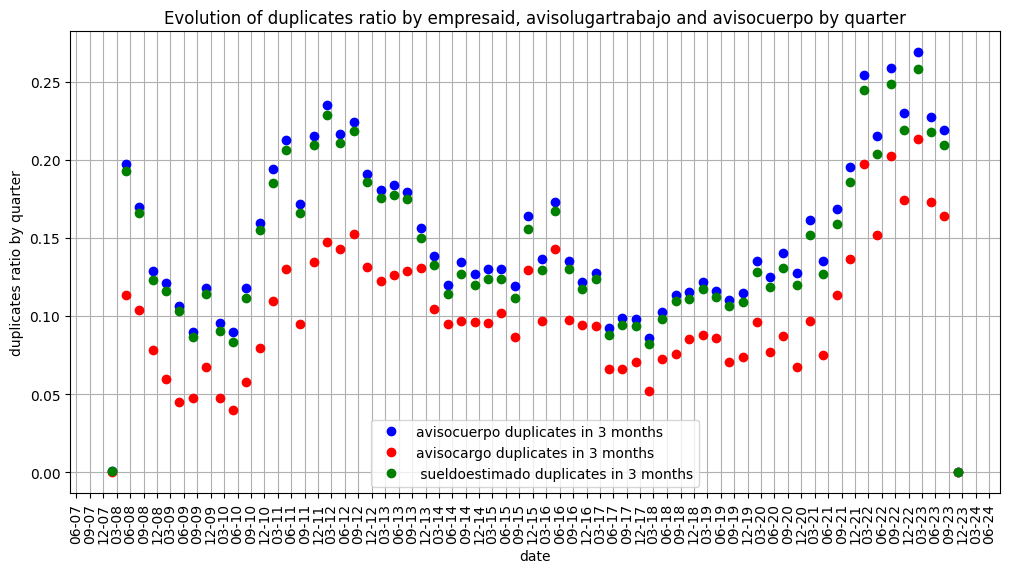

In [40]:
# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(newData3m['avisofechapublicacion'], newData3m['duplicates_avisocuerpo3m'] / newData3m['avisoid'], marker='o', linestyle='None', color='b', label='avisocuerpo duplicates in 3 months')
plt.plot(newData3m['avisofechapublicacion'], newData3m['duplicates_avisocargo3m'] / newData3m['avisoid'], marker='o', linestyle='None', color='r', label='avisocargo duplicates in 3 months')
plt.plot(newData3m['avisofechapublicacion'], newData3m['duplicates_sueldoestimado3m'] / newData3m['avisoid'], marker='o', linestyle='None', color='g', label=' sueldoestimado duplicates in 3 months')

# Format the x-axis ticks to show 'mm-y' and rotate them
date_format = mdates.DateFormatter('%m-%y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set tick frequency to 6 months
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees

plt.title('Evolution of duplicates ratio by empresaid, avisolugartrabajo and avisocuerpo by quarter')
plt.xlabel('date')
plt.ylabel('duplicates ratio by quarter')
plt.grid(True)
plt.legend()

plt.show()

______________________

### WFH graphs

In [77]:
wfhData_d = wfhData[['avisoid', 'empresaid', 'avisofechapublicacion', 'avisovacante',
                     'bucket1', 'bucket2', 'bucket3', 'bucket4', 'wfh', 'duplicates_avisocuerpo3m' ]]

In [78]:
wfhData3m = wfhData_d.resample('3m', on='avisofechapublicacion').agg(
    {'avisoid': 'count',
     'empresaid': 'nunique',
     'avisovacante' : 'sum',
     'wfh' : 'sum',
     'bucket1' : 'sum',
     'bucket2' : 'sum',
     'bucket3' : 'sum',
     'bucket4' : 'sum',
     'duplicates_avisocuerpo3m' : 'sum'}).reset_index()

In [80]:
wfhData3m['avisoid'] = newData3m['avisoid']
wfhData3m['avisovacantet'] = newData3m['avisovacante']

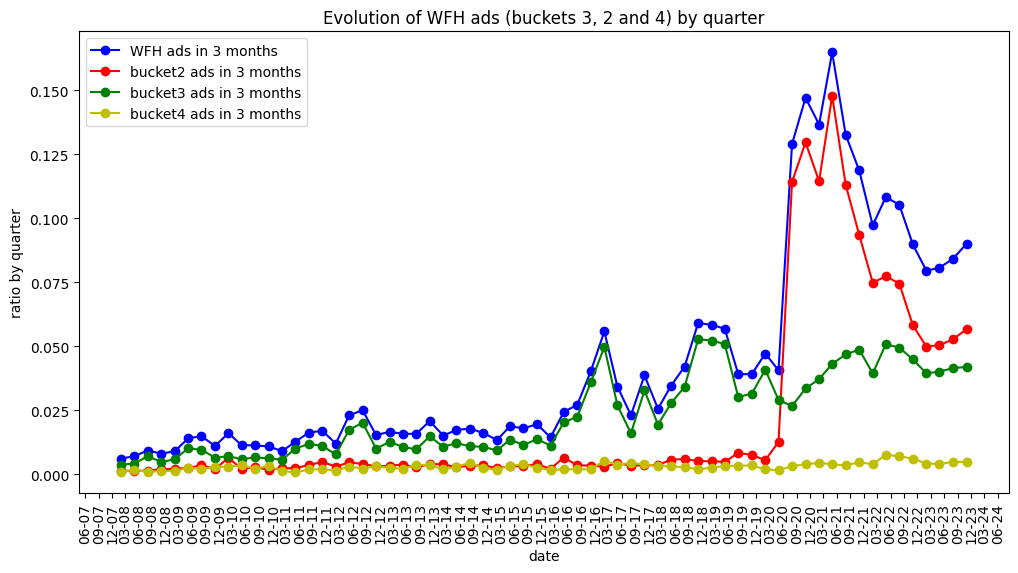

In [69]:
# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(wfhData3m['avisofechapublicacion'], wfhData3m['wfh'] / wfhData3m['avisoid'], marker='o', linestyle='-', color='b', label='WFH ads in 3 months')
plt.plot(wfhData3m['avisofechapublicacion'], wfhData3m['bucket2'] / wfhData3m['avisoid'], marker='o', linestyle='-', color='r', label='bucket2 ads in 3 months')
plt.plot(wfhData3m['avisofechapublicacion'], wfhData3m['bucket3'] / wfhData3m['avisoid'], marker='o', linestyle='-', color='g', label='bucket3 ads in 3 months')
plt.plot(wfhData3m['avisofechapublicacion'], wfhData3m['bucket4'] / wfhData3m['avisoid'], marker='o', linestyle='-', color='y', label='bucket4 ads in 3 months')

# Format the x-axis ticks to show 'mm-y' and rotate them
date_format = mdates.DateFormatter('%m-%y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set tick frequency to 6 months
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees

plt.title('Evolution of WFH ads (buckets 3, 2 and 4) by quarter')
plt.xlabel('date')
plt.ylabel('ratio by quarter')
plt.grid(False)
plt.legend()

plt.show()

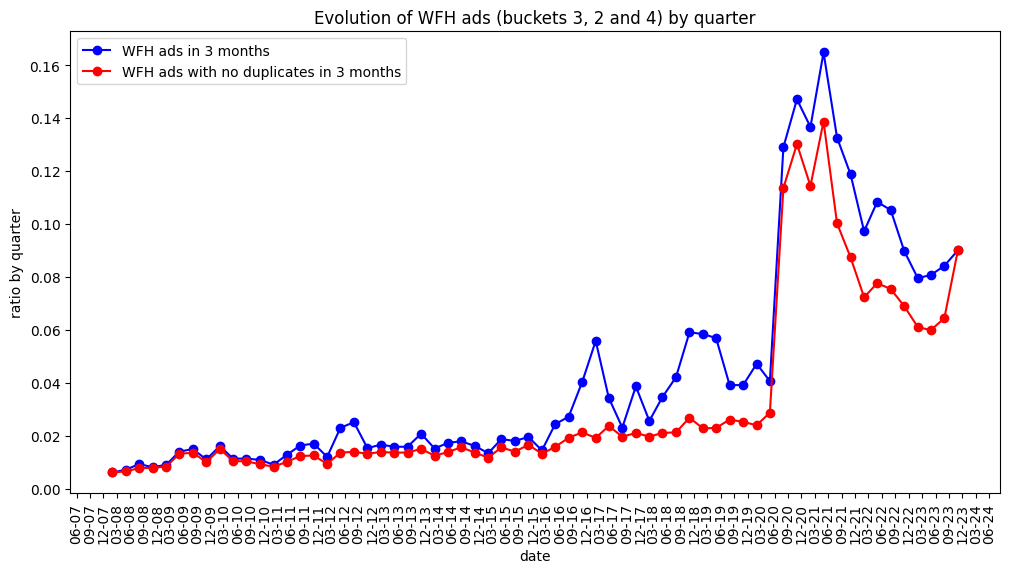

In [68]:
# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(wfhData3m['avisofechapublicacion'], wfhData3m['wfh'] / wfhData3m['avisoid'], marker='o', linestyle='-', color='b', label='WFH ads in 3 months')
plt.plot(wfhData3m['avisofechapublicacion'], (wfhData3m['wfh'] - wfhData3m['duplicates_avisocuerpo3m']) / wfhData3m['avisoid'], marker='o', linestyle='-', color='r', label='WFH ads with no duplicates in 3 months')

# Format the x-axis ticks to show 'mm-y' and rotate them
date_format = mdates.DateFormatter('%m-%y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set tick frequency to 6 months
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees

plt.title('Evolution of WFH ads (buckets 3, 2 and 4) by quarter')
plt.xlabel('date')
plt.ylabel('ratio by quarter')
plt.grid(False)
plt.legend()

plt.show()

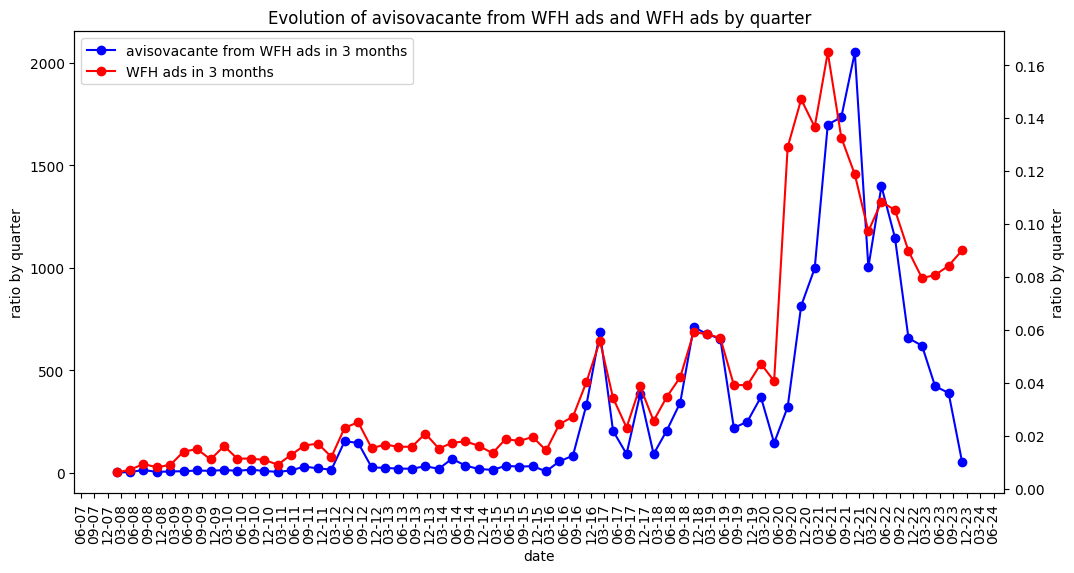

In [89]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create the figure and the first axes (left y-axis)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first data on the left y-axis
ax1.plot(wfhData3m['avisofechapublicacion'], wfhData3m['wfh']*wfhData3m['avisovacante'] / wfhData3m['avisovacantet'], marker='o', linestyle='-', color='b', label='avisovacante from WFH ads in 3 months')

# Format the x-axis ticks to show 'mm-y' and rotate them
date_format = mdates.DateFormatter('%m-%y')
ax1.xaxis.set_major_formatter(date_format)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set tick frequency to 6 months
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees

# Set labels and title for the left y-axis
ax1.set_xlabel('date')
ax1.set_ylabel('ratio by quarter')
ax1.grid(False)

# Create the second axes (right y-axis)
ax2 = ax1.twinx()

# Plot the second data on the right y-axis
# You can replace 'second_data' with your actual data
ax2.plot(wfhData3m['avisofechapublicacion'], wfhData3m['wfh'] / wfhData3m['avisoid'], marker='o', linestyle='-', color='r', label='WFH ads in 3 months')

# Set labels and title for the right y-axis
ax2.set_ylabel('ratio by quarter')

# Adjust the legend locations
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Evolution of avisovacante from WFH ads and WFH ads by quarter')

plt.show()
